# Ejemplo PCA
Rafael Fernández

* Correr todas las celdas con Run All para evitar problemas

In [193]:
# Instalar por pip si falta alguna de las siguientes librerias 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import seaborn as sns

%matplotlib notebook

In [194]:
n = 1000 # Cantidad de datos
min_data = 0
max_data = 100
x_translation = 0
x_slope = 1

y_translation = 0
y_slope = 2

z_factor = 1
z_freq = 0.2

steps = np.linspace(min_data, max_data, n)

delta_var = 3
deltax = np.random.normal(scale=delta_var, size=n)
deltay = np.random.normal(scale=delta_var, size=n)
deltaz = np.random.normal(scale=0.1, size=n)

x = x_slope * steps + x_translation + deltax
y = y_slope * steps + y_translation + deltay

#### X-Y Scatterplot

<IPython.core.display.Javascript object>


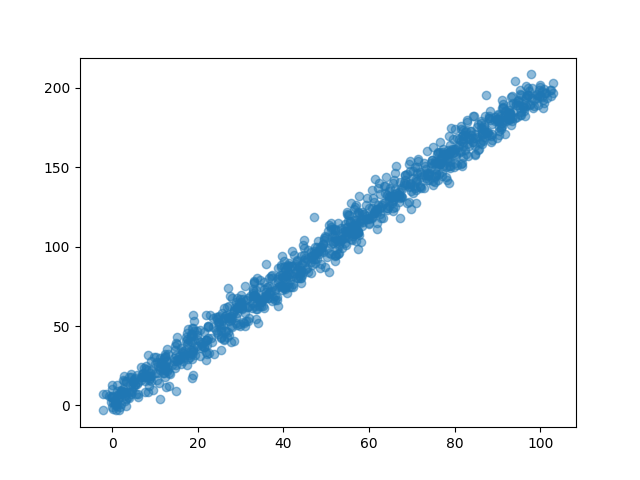

In [195]:
fig, ax = plt.subplots()
ax.scatter(x,y, alpha=0.5)
plt.show()

In [196]:
z = z_factor * np.sin(z_freq * steps) + deltaz

<IPython.core.display.Javascript object>


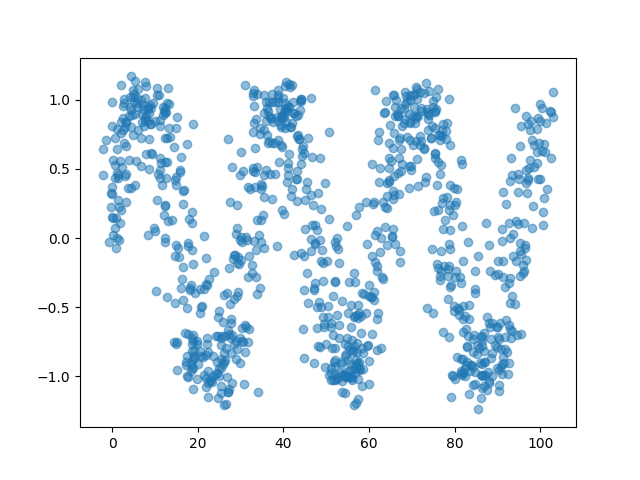

In [197]:
fig, ax = plt.subplots()
ax.scatter(x,z, alpha=0.5)
plt.show()

<IPython.core.display.Javascript object>


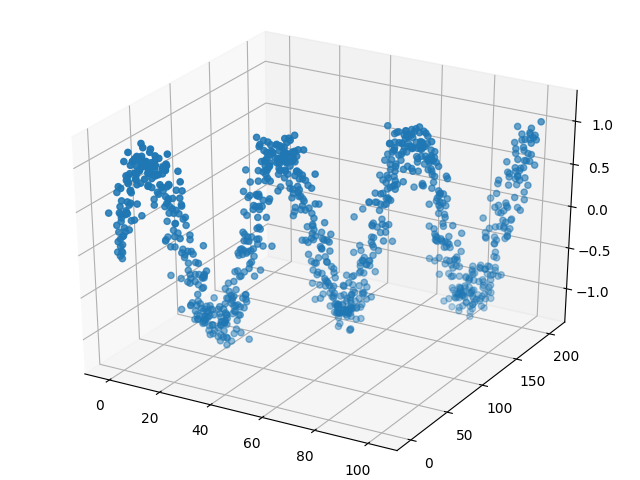

In [198]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
plt.show()

In [199]:
data = pd.DataFrame({"x" : x, "y" : y, "z" : z})
data.describe()

,x,y,z
count,1000.000000,1000.000000,1000.000000
mean,49.941913,99.946950,0.027303
std,29.153135,57.873595,0.708291
min,-2.214404,-3.107093,-1.239545
25%,25.515764,50.221229,-0.688865
50%,50.594077,99.738620,0.061416
75%,75.581355,150.778548,0.710489
max,103.105821,208.363748,1.176598


### Normalización de datos

Se resta la media y se divide por la desviación estándar cada dato. Esto modifica la escala de los datos. Se centran en cero y "se aprientan". El nuevo conjunto tendrá desviacion estandar 1 y así se evita que el PCA determine que dominan, y que por lo tanto son la observacion más importante.

In [200]:
scaler = preprocessing.StandardScaler()

scaled = scaler.fit_transform(data)

data = pd.DataFrame(scaled, columns = ["x", "y", "z"])

x = data["x"].to_numpy()
y = data["y"].to_numpy()
z = data["z"].to_numpy()

<IPython.core.display.Javascript object>


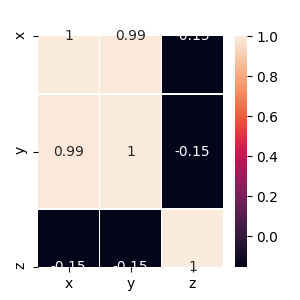

In [201]:
plt.figure(figsize=(3,3))
sns.heatmap(data.cov(), annot=True, linewidth=0.5)

In [202]:
values, vectors = np.linalg.eig(data.cov())
x0, y0, z0 = np.full((3, 3), np.array([x.mean(), y.mean(), z.mean()])).transpose()
x1, y1, z1 = vectors

## Mostrando los componentes principales

<IPython.core.display.Javascript object>


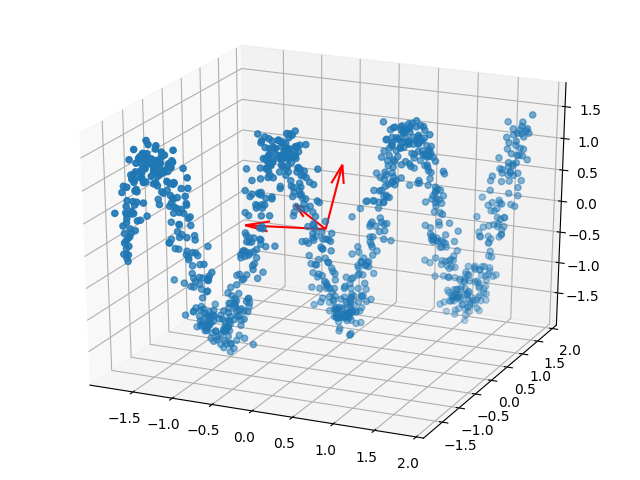

In [203]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
# ax.set_xlim(-(max_data * x_slope), max_data * x_slope)
# ax.set_ylim(-(max_data * y_slope), max_data * y_slope)
# ax.set_zlim(-1 * z_factor, z_factor)
ax.quiver(x0, y0, z0, x1, y1, z1, length=1, color="red")
fig.show()

### Ordenando vectores y valores propios

In [204]:
index = values.argsort()[::-1]   
values = values[index]
vectors = vectors[:, index].T

print(values)
print(vectors)

nombres = ("primero", "segundo", "tercero")

for _index, value in enumerate(values):
    print(f"Porcentaje de info en {nombres[_index]} {round(value * 100 / values.sum(), 3)} %")


[2.04071043 0.95553957 0.006753  ]
[[-6.92112211e-01 -6.92161282e-01  2.04678887e-01]
 [ 1.44981362e-01  1.44478295e-01  9.78829110e-01]
 [-7.07079268e-01  7.07134204e-01  3.55293307e-04]]
Porcentaje de info en primero 67.956 %
Porcentaje de info en segundo 31.819 %
Porcentaje de info en tercero 0.225 %


Ahora nos quedamos con los vectores propios cuyo valor propio contiene la mayor cantidad de información. En este caso, el primero y el segundo.

Así, nuestra base serán los dos primeros vectores propios.


In [205]:
base = np.delete(vectors, 2, axis=1)

## Calculando nuevo set de datos
Estos se obtienen multiplicando la traspuesta de la nueva base multiplicada por la traspuesta de los datos originales.

In [206]:
new_data = base.T.dot(data.to_numpy().T)

new_x, new_y = new_data # Sacamos x e y para plotear

<IPython.core.display.Javascript object>


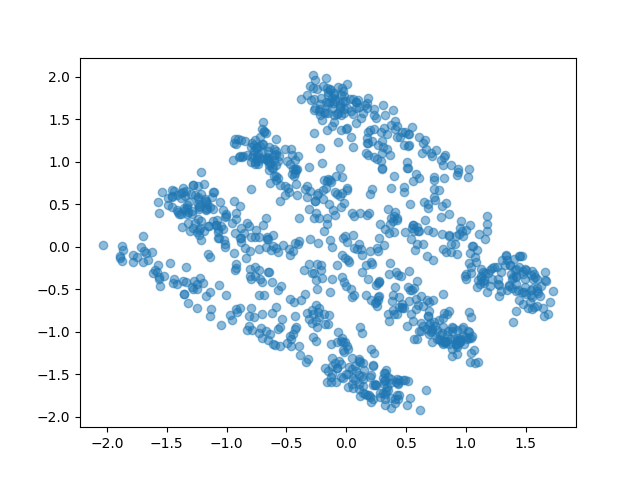

In [207]:
fig, ax = plt.subplots()
ax.scatter(new_x, new_y, alpha=0.5)
plt.show()

Ahora se pueden ver los datos desde otra perspectiva. Se eliminó un poco de información y se obtuvo otra mirada de los datos. Ahora los ejes son mezclas de las variables anteriores, por lo que ya no representan lo mismo. Sin embargo, nos quedamos con lo importante y ahora se pueden ver nuevas relaciones entre los datos que antes era más difícil de ver.
Si los datos no se hubiesen normalizado, no se habría mostrado ese patrón, ya que la variable X hubiera dominado sobre la Z. Se puede probar comentando la casilla de normalizacion de los datos y ejecutando las celdas de nuevo.